# Data Science Assignment

In [1233]:
#Importing standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data exploration & Cleaning

In [1281]:
#Reading Dataframe
df=pd.read_csv('census03_1.csv')
df.info() #Brief decription of the features of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10083 non-null  int64 
 1   Street                         10083 non-null  object
 2   First Name                     10083 non-null  object
 3   Surname                        10083 non-null  object
 4   Age                            10083 non-null  object
 5   Relationship to Head of House  10083 non-null  object
 6   Marital Status                 7526 non-null   object
 7   Gender                         10083 non-null  object
 8   Occupation                     10083 non-null  object
 9   Infirmity                      10083 non-null  object
 10  Religion                       7463 non-null   object
dtypes: int64(1), object(10)
memory usage: 866.6+ KB


In [1282]:
df.head(20) # description of the head of the dataset

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Media planner,None,Christian
1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,None,Muslim
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,None,Christian
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",None,None
4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired Retail banker,None,Christian
5,5,Gray Centers,Anna,Edwards,62,Head,Single,Female,"Civil engineer, consulting",None,Christian
6,5,Gray Centers,Terry,Holt,63,Partner,Single,Male,Careers adviser,None,Christian
7,6,Gray Centers,Stewart,Turner,50,Head,Single,Male,Press photographer,None,Catholic
8,7,Gray Centers,Glenn,Carr,35,Head,Single,Male,Bookseller,None,None
9,8,Gray Centers,Maurice,Hussain,29,Head,Single,Male,"Engineer, materials",None,Catholic


In [1283]:
#Cocatenating the House number with the street to form an Address column
df['Address']= df['House Number'].astype(str)+ " " +df['Street'].astype(str)

In [1284]:
df[df['First Name']==" "] #Determining the rows in the first name column with blanks

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
628,182,Andrews Avenue,,Ashton,64,Husband,Married,Male,Educational psychologist,None,None,182 Andrews Avenue
2887,132,Lightning Street,,Holland,48,Head,Married,Female,"Therapist, drama",None,Catholic,132 Lightning Street
7231,55,Peel Road,,Mills,31,Head,Single,Female,Recycling officer,None,None,55 Peel Road
9299,40,Wheeler Light,,O'Brien,46,Head,Single,Female,"Programmer, multimedia",None,Methodist,40 Wheeler Light


In [1285]:
#Replacing blanks in first Name column with Unknown
df['First Name'] = df.apply(lambda x: 'Unknown' if x['First Name'].isspace() else x['First Name'], axis=1) #The code uses the .apply method to apply the lambda function to each value in the first Name column

In [1286]:
df[df['Surname']==" "] #Determining the rows in the Surname column with blanks

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
367,81,Andrews Avenue,Toby,,54,None,Single,Male,Local government officer,None,Methodist,81 Andrews Avenue
3462,223,Lightning Street,Bernard,,17,Son,NaN,Male,Student,None,NaN,223 Lightning Street


In [1287]:
#Replacing the blanks in the Surname column with Unknown
df['Surname'] = df.apply(lambda x: 'Unknown' if x['Surname'].isspace() else x['Surname'], axis=1) #The code uses the .apply method to apply the lambda function to each value in the first Name column

In [1288]:
#convert Age to Numeric format
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [1291]:
# Determinining the blanks in the Age column
df[df['Age'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
756,15,Hawthorn Knolls,Nicola,Anderson,NaN,Wife,Married,Female,Automotive engineer,None,Methodist,15 Hawthorn Knolls
3389,209,Lightning Street,Duncan,Hammond,NaN,Son,Divorced,Male,"Scientist, water quality",None,Christian,209 Lightning Street


In [1292]:
#filling the blanks with the median of the dataset after considering the relationship to the head of the house,Marital Status and Occupation Columns
Age_m=df['Age'].median()# Calculate the Median of Ages in the Age column
df['Age'].fillna(Age_m,inplace=True)# fill NA with median value of the dataset 

In [1293]:
df['Age']=df['Age'].apply(int)# Convert float to integer

In [1294]:
df.info()# checking the features of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10083 non-null  int64 
 1   Street                         10083 non-null  object
 2   First Name                     10083 non-null  object
 3   Surname                        10083 non-null  object
 4   Age                            10083 non-null  int64 
 5   Relationship to Head of House  10083 non-null  object
 6   Marital Status                 7526 non-null   object
 7   Gender                         10083 non-null  object
 8   Occupation                     10083 non-null  object
 9   Infirmity                      10083 non-null  object
 10  Religion                       7463 non-null   object
 11  Address                        10083 non-null  object
dtypes: int64(2), object(10)
memory usage: 945.4+ KB


In [1295]:
#Grouping the ages into different age ranges based on the labels and bins
df['Age_group'] = pd.cut(df['Age'], bins=range(-1, 118, 9), labels=['0-8', '9-17', '18-26', '27-35', '36-44', '45-53', '54-62', '63-71', '72-80', '81-89', '90-98', '99-107', '108+'])

In [1296]:
# Determining the null values in the Marital Status column
df[df['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group
16,2,Bletchleyrow Street,Lynn,Jones,17,Daughter,NaN,Female,Student,None,NaN,2 Bletchleyrow Street,9-17
17,2,Bletchleyrow Street,Joshua,Jones,16,Son,NaN,Male,Student,None,NaN,2 Bletchleyrow Street,9-17
18,2,Bletchleyrow Street,Ruth,Jones,14,Daughter,NaN,Female,Student,None,NaN,2 Bletchleyrow Street,9-17
19,2,Bletchleyrow Street,Abbie,Jones,8,Daughter,NaN,Female,Student,None,NaN,2 Bletchleyrow Street,0-8
21,3,Bletchleyrow Street,Stacey,Field-Webb,1,Daughter,NaN,Female,Child,None,NaN,3 Bletchleyrow Street,0-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,1,St.Matthew Manorhouse,Norman,Bird,15,Son,NaN,Male,Student,None,NaN,1 St.Matthew Manorhouse,9-17
10070,1,St.Matthew Manorhouse,Catherine,Bird,15,Daughter,NaN,Female,Student,None,NaN,1 St.Matthew Manorhouse,9-17
10071,1,St.Matthew Manorhouse,Trevor,Bird,15,Son,NaN,Male,Student,None,NaN,1 St.Matthew Manorhouse,9-17
10072,1,St.Matthew Manorhouse,Charlene,Bird,15,Daughter,NaN,Female,Student,None,NaN,1 St.Matthew Manorhouse,9-17


In [1297]:
#Determining the Max Age for the null Age values
df[df['Marital Status'].isna()]['Age'].max()

17

In [1298]:
# replacing NaN values with empty string
df['Marital Status'].fillna('', inplace=True)

# apply lambda function to fill in blank values by cocatenating with the occupation status since majority are likelysingle (less than 18 Years)
df['Marital Status'] = df.apply(lambda x: 'Single ' + x['Occupation'] if str(x['Marital Status']).strip() == '' else x['Marital Status'], axis=1)


In [1299]:
#Determining the married individuals less than 18
df[(df['Age'] < 18) & (df['Marital Status'] == 'Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group
982,6,Warren Bypass,Sian,Walker,16,Head,Married,Female,Student,None,NaN,6 Warren Bypass,9-17


In [1300]:
#Removing the household where the head of the family is less than 18 and married
# get the addresses of households where head is less than 18 and married
addresses = df.loc[((df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18) & (df['Marital Status'] == 'Married')), 'Address'].tolist()

# remove all rows where address is in the above list
df = df[~df['Address'].isin(addresses)]



In [1301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10082
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   10080 non-null  int64   
 1   Street                         10080 non-null  object  
 2   First Name                     10080 non-null  object  
 3   Surname                        10080 non-null  object  
 4   Age                            10080 non-null  int64   
 5   Relationship to Head of House  10080 non-null  object  
 6   Marital Status                 10080 non-null  object  
 7   Gender                         10080 non-null  object  
 8   Occupation                     10080 non-null  object  
 9   Infirmity                      10080 non-null  object  
 10  Religion                       7462 non-null   object  
 11  Address                        10080 non-null  object  
 12  Age_group                      1

In [1302]:
# replace NaN values with empty string
df['Marital Status'].fillna('', inplace=True)

# apply lambda function to fill in blank values
df['Marital Status'] = df.apply(lambda x: 'Single ' + x['Occupation'] if str(x['Marital Status']).strip() == '' else x['Marital Status'], axis=1)


In [1303]:
#Removing blanks from the occupation column
df[df['Occupation']==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group
5696,88,September Street,Emma,Doyle,41,Daughter,Single,Female,,None,Methodist,88 September Street,36-44


In [1304]:
#filling the blank space in the occupation colum with unknown
df['Occupation'] = df.apply(lambda x: 'Unfilled' if x['Occupation'].isspace() else x['Occupation'], axis=1)

In [1305]:
#Identifying the missing values in the infirmity column
df[df['Infirmity']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group
702,5,Lynch Spurs,Hollie,Rees,16,Granddaughter,Single Student,Female,Student,,NaN,5 Lynch Spurs,9-17
1758,17,Roberts Divide,Victoria,Francis,45,Head,Single,Female,Art gallery manager,,None,17 Roberts Divide,45-53
1794,28,Roberts Divide,Leon,Conway,59,Husband,Married,Male,Learning disability nurse,,Christian,28 Roberts Divide,54-62
2243,41,Lightning Street,Iain,Johnson,32,Son,Single,Male,"Surveyor, insurance",,Christian,41 Lightning Street,27-35
2978,148,Lightning Street,Molly,Lambert,26,Daughter,Single,Female,Radio broadcast assistant,,Christian,148 Lightning Street,18-26
3646,6,Plymouth Drive,Lewis,Akhtar,29,None,Single,Male,PhD Student,,Buddist,6 Plymouth Drive,27-35
4000,18,Shepherd Cove,Lynda,Bruce,29,Daughter,Single,Female,Facilities manager,,Catholic,18 Shepherd Cove,27-35
4675,131,Shepherd Cove,Rita,Akhtar,10,Granddaughter,Single Student,Female,Student,,NaN,131 Shepherd Cove,9-17
4821,153,Shepherd Cove,Robin,Fleming,22,Lodger,Divorced,Male,University Student,,None,153 Shepherd Cove,18-26
7789,22,Khan Keys,Sharon,Jackson,59,Head,Married,Female,Clothing/textile technologist,,None,22 Khan Keys,54-62


In [1306]:
#Replacing blanks with the string 'unfilled'
df['Infirmity'] = df.apply(lambda x: 'Unfilled' if x['Infirmity'].isspace() else x['Infirmity'], axis=1)

In [1307]:
#Recategorizing Occupation into a new column Employment Status
df['Employment Status'] = ''

# use the replace() function to recategorize the occupation data
df['Employment Status'] = df['Occupation'].apply(lambda x: 'Employed' if x not in ['Retired', 'Student', 'University Student', 'PhD Student', 'Child', 'Unemployed'] else 'University Student' if x in ['University Student', 'PhD Student'] else x)

# replace rows where age > 65 and employment status is employed with retired
df['Employment Status'] = df.apply(lambda x: 'Retired' if (x['Age'] > 65 and x['Employment Status'] == 'employed') or 'retired' in x['Occupation'].lower() else x['Employment Status'], axis=1)

# replace rows where age > 65 and employment status is employed with retired
df['Employment Status'] = df.apply(lambda x: 'Retired' if (x['Age'] > 65 and x['Employment Status'] == 'Unemployed') or 'retired' in x['Occupation'].lower() else x['Employment Status'], axis=1)

In [1310]:
df[df['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status
16,2,Bletchleyrow Street,Lynn,Jones,17,Daughter,Single Student,Female,Student,None,NaN,2 Bletchleyrow Street,9-17,Student
17,2,Bletchleyrow Street,Joshua,Jones,16,Son,Single Student,Male,Student,None,NaN,2 Bletchleyrow Street,9-17,Student
18,2,Bletchleyrow Street,Ruth,Jones,14,Daughter,Single Student,Female,Student,None,NaN,2 Bletchleyrow Street,9-17,Student
19,2,Bletchleyrow Street,Abbie,Jones,8,Daughter,Single Student,Female,Student,None,NaN,2 Bletchleyrow Street,0-8,Student
21,3,Bletchleyrow Street,Stacey,Field-Webb,1,Daughter,Single Child,Female,Child,None,NaN,3 Bletchleyrow Street,0-8,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,1,St.Matthew Manorhouse,Norman,Bird,15,Son,Single Student,Male,Student,None,NaN,1 St.Matthew Manorhouse,9-17,Student
10070,1,St.Matthew Manorhouse,Catherine,Bird,15,Daughter,Single Student,Female,Student,None,NaN,1 St.Matthew Manorhouse,9-17,Student
10071,1,St.Matthew Manorhouse,Trevor,Bird,15,Son,Single Student,Male,Student,None,NaN,1 St.Matthew Manorhouse,9-17,Student
10072,1,St.Matthew Manorhouse,Charlene,Bird,15,Daughter,Single Student,Female,Student,None,NaN,1 St.Matthew Manorhouse,9-17,Student


In [1315]:
#determining the mean,min, max Ages for the filtered dataframe above to understand the age distribution of unfilled values
df[df['Religion'].isna()]['Age'].describe()

count    2618.000000
mean        8.976318
std         5.304000
min         0.000000
25%         5.000000
50%         9.000000
75%        14.000000
max        25.000000
Name: Age, dtype: float64

In [1355]:
#Determining the religion of the head of a house and using it to fill the blanks in the religion column for people younger than 18 Years.
get_religion_for_head = lambda x: x['Religion'] if x['Age'] >= 18 and not pd.isna(x['Religion']) else df.loc[df['Address'] == x['Address'], 'Religion'].iloc[0]
df['Religion'] = df.apply(get_religion_for_head, axis=1) #Applying the result to the religion column

In [1359]:
#Determining unique values in the religion Dataframe
df['Religion'].unique()

array(['Christian', 'Muslim', 'None', 'Catholic', 'Methodist', nan,
       'Sikh', 'Jewish', 'Undecided', 'Buddist', 'Bahai', 'Housekeeper',
       'Orthodoxy', 'Sith', 'Nope'], dtype=object)

In [1361]:
df[df['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status
126,30,Bletchleyrow Street,Dominic,Stephenson,17,Head,Single,Male,Unemployed,None,NaN,30 Bletchleyrow Street,9-17,Unemployed
127,30,Bletchleyrow Street,Frederick,Stephenson,0,Son,Single Child,Male,Child,None,NaN,30 Bletchleyrow Street,0-8,Child
900,20,Fish Stravenue,Elliot,Dobson,18,Head,Single,Male,Student,None,NaN,20 Fish Stravenue,18-26,Student
1318,29,Bennett Crescent,Lydia,Jones,18,Head,Single,Female,Student,None,NaN,29 Bennett Crescent,18-26,Student
1781,25,Roberts Divide,Jennifer,Campbell,17,Head,Single,Female,Student,None,NaN,25 Roberts Divide,9-17,Student
1782,25,Roberts Divide,Nicholas,Smith,19,Partner,Single,Male,University Student,None,NaN,25 Roberts Divide,18-26,University Student
2461,70,Lightning Street,Ricky,Greenwood,18,Head,Single,Male,Student,None,NaN,70 Lightning Street,18-26,Student
3735,5,Virgo Lane,Graeme,Bowen,18,Head,Single,Male,Student,None,NaN,5 Virgo Lane,18-26,Student
4764,144,Shepherd Cove,Karl,Taylor,22,Head,Single,Male,University Student,None,NaN,144 Shepherd Cove,18-26,University Student
4943,39,George Parks,Jay,Cunningham,18,Head,Single,Male,Student,None,NaN,39 George Parks,18-26,Student


In [1365]:
#filling the remaining blank columns with unfilled; the once lesser than 18 were either the head of the house or a child whose head had no religion
df['Religion'] = df['Religion'].fillna('Unfilled')
df['Religion'] = df['Religion'].replace([' ','Nope','Sith','Housekeeper'], 'Unknown') # Joke entries removed from dataframe

In [1366]:
#Creating a Religion group column
df['Religion_group'] = df['Religion'].replace(['Catholic','Methodist', 'Orthodoxy'], 'Christian')

In [1367]:
df.head(40)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status,Religion_group
0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Media planner,None,Christian,1 Gray Centers,45-53,Employed,Christian
1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,None,Muslim,2 Gray Centers,18-26,University Student,Muslim
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,None,Christian,3 Gray Centers,54-62,Employed,Christian
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",None,None,3 Gray Centers,45-53,Employed,None
4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired Retail banker,None,Christian,4 Gray Centers,72-80,Retired,Christian
5,5,Gray Centers,Anna,Edwards,62,Head,Single,Female,"Civil engineer, consulting",None,Christian,5 Gray Centers,54-62,Employed,Christian
6,5,Gray Centers,Terry,Holt,63,Partner,Single,Male,Careers adviser,None,Christian,5 Gray Centers,63-71,Employed,Christian
7,6,Gray Centers,Stewart,Turner,50,Head,Single,Male,Press photographer,None,Catholic,6 Gray Centers,45-53,Employed,Christian
8,7,Gray Centers,Glenn,Carr,35,Head,Single,Male,Bookseller,None,None,7 Gray Centers,27-35,Employed,None
9,8,Gray Centers,Maurice,Hussain,29,Head,Single,Male,"Engineer, materials",None,Catholic,8 Gray Centers,27-35,Employed,Christian


In [1368]:
df['Religion'].unique()#Viewing the unique entries in the religion column

array(['Christian', 'Muslim', 'None', 'Catholic', 'Methodist', 'Unfilled',
       'Sikh', 'Jewish', 'Undecided', 'Buddist', 'Bahai', 'Unknown',
       'Orthodoxy'], dtype=object)

In [1369]:
df['Religion_group'].unique()#Viewing the unique entries in the religion group column

array(['Christian', 'Muslim', 'None', 'Unfilled', 'Sikh', 'Jewish',
       'Undecided', 'Buddist', 'Bahai', 'Unknown'], dtype=object)

In [1370]:
df['Religion_group'].value_counts()

Christian    5405
None         4299
Muslim        185
Sikh           88
Jewish         59
Unfilled       30
Undecided       6
Unknown         6
Buddist         1
Bahai           1
Name: Religion_group, dtype: int64

In [1371]:
df.head(50)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status,Religion_group
0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Media planner,None,Christian,1 Gray Centers,45-53,Employed,Christian
1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,None,Muslim,2 Gray Centers,18-26,University Student,Muslim
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,None,Christian,3 Gray Centers,54-62,Employed,Christian
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",None,None,3 Gray Centers,45-53,Employed,None
4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired Retail banker,None,Christian,4 Gray Centers,72-80,Retired,Christian
5,5,Gray Centers,Anna,Edwards,62,Head,Single,Female,"Civil engineer, consulting",None,Christian,5 Gray Centers,54-62,Employed,Christian
6,5,Gray Centers,Terry,Holt,63,Partner,Single,Male,Careers adviser,None,Christian,5 Gray Centers,63-71,Employed,Christian
7,6,Gray Centers,Stewart,Turner,50,Head,Single,Male,Press photographer,None,Catholic,6 Gray Centers,45-53,Employed,Christian
8,7,Gray Centers,Glenn,Carr,35,Head,Single,Male,Bookseller,None,None,7 Gray Centers,27-35,Employed,None
9,8,Gray Centers,Maurice,Hussain,29,Head,Single,Male,"Engineer, materials",None,Catholic,8 Gray Centers,27-35,Employed,Christian


In [1375]:
df.info()#Viewing the description of the clean dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10082
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   10080 non-null  int64   
 1   Street                         10080 non-null  object  
 2   First Name                     10080 non-null  object  
 3   Surname                        10080 non-null  object  
 4   Age                            10080 non-null  int64   
 5   Relationship to Head of House  10080 non-null  object  
 6   Marital Status                 10080 non-null  object  
 7   Gender                         10080 non-null  object  
 8   Occupation                     10080 non-null  object  
 9   Infirmity                      10080 non-null  object  
 10  Religion                       10080 non-null  object  
 11  Address                        10080 non-null  object  
 12  Age_group                      1

## Data Visualization

In [1373]:
# Feature extraction for the Age Pyramid
Age_group = df['Age_group'].unique()
Male = df['Gender'] == 'Male'
Female = df['Gender'] == 'Female'
male_count = Male.groupby(df['Age_group']).sum().values
female_count = Female.groupby(df['Age_group']).sum().values

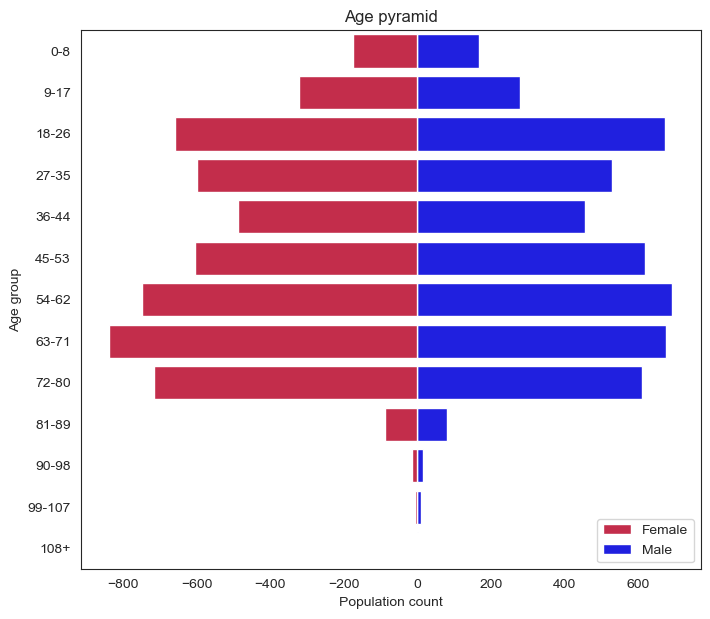

In [912]:

# Create the data frame
data = {'Age_group': Age_group, 'Male': male_count, 'Female': female_count}
Age_df = pd.DataFrame(data)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8,7))

# Plot the male and female bars
sns.barplot(x=Age_df['Male'], y='Age_group', data=Age_df, color='blue', label='Male', ax=ax)
sns.barplot(x=-Age_df['Female'], y='Age_group', data=Age_df, color='crimson', label='Female', ax=ax)

# Add labels and titles
ax.set_xlabel('Population count')
ax.set_ylabel('Age group')
ax.set_title('Age pyramid')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower right')

# Invert the y-axis

plt.savefig('age_pyramid.png', dpi=300)
# Show the plot
plt.show()


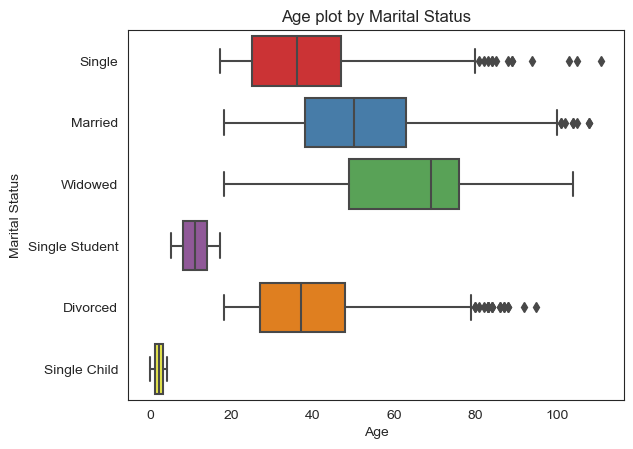

In [1377]:
sns.set_style('white')
sns.boxplot(data=df,x='Age',y='Marital Status',palette='Set1')
plt.title('Age plot by Marital Status')
plt.savefig('Age box plot by Marital Status', dpi=300, bbox_inches='tight')
plt.show()

In [1378]:
#Median Age of marital Status
mar_med=df.groupby('Marital Status')['Age'].mean().astype(int)
print(" Mean Age per",mar_med)


 Mean Age per Marital Status
Divorced          39
Married           51
Single            37
Single Child       1
Single Student    11
Widowed           63
Name: Age, dtype: int32


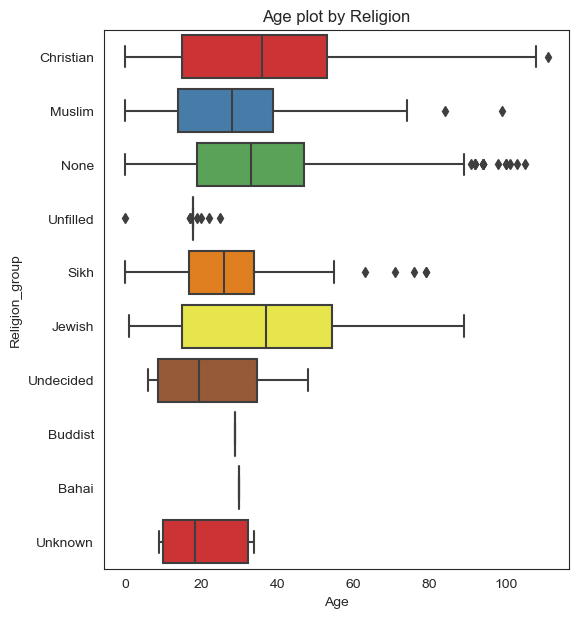

In [1379]:
#Religion Box Plot
fig, ax = plt.subplots(figsize=(6,7))
sns.boxplot(data=df,x='Age',y='Religion_group', palette='Set1')
plt.title('Age plot by Religion')
plt.savefig('Age box plot by Religion', dpi=300, bbox_inches='tight')

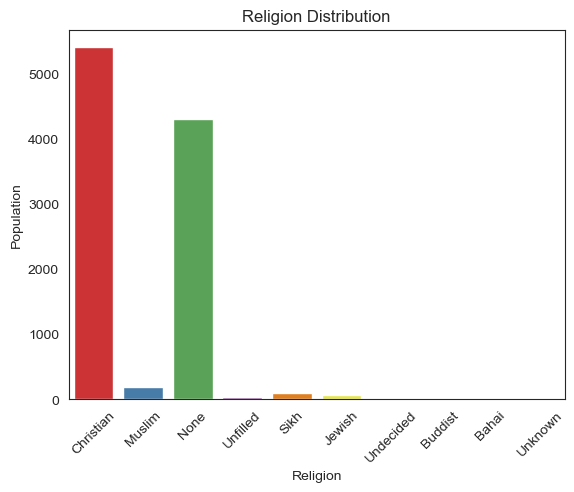

In [1381]:
#Bar plot for religon distribution
sns.set_style('white')
sns.barplot(x='Religion_group', y='Age',palette='Set1', data=df, estimator=len)
plt.xlabel('Religion')
plt.ylabel('Population')
plt.title('Religion Distribution')
plt.xticks(rotation=45)
plt.savefig('Religion bar plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [1382]:
df['Religion'].value_counts()

None         4299
Christian    2983
Catholic     1554
Methodist     866
Muslim        185
Sikh           88
Jewish         59
Unfilled       30
Undecided       6
Unknown         6
Orthodoxy       2
Buddist         1
Bahai           1
Name: Religion, dtype: int64

In [1537]:
Median=df.groupby('Religion_group')['Age'].median().astype(int)
print(" Median Age per",Median)

 Median Age per Religion_group
Bahai        30
Buddist      29
Christian    36
Jewish       37
Muslim       28
None         33
Sikh         26
Undecided    19
Unfilled     18
Unknown      18
Name: Age, dtype: int32


In [1385]:
#Mean Age per employment status
Emp_mean=df.groupby('Employment Status')['Age'].mean().astype(int)
print(" Mean Age per",Emp_mean)

 Mean Age per Employment Status
Child                  1
Employed              42
Retired               76
Student               11
Unemployed            41
University Student    20
Name: Age, dtype: int32


In [1386]:
#Median Age per employment status
Emp_med=df.groupby('Employment Status')['Age'].median().astype(int)
print(" Median Age per",Emp_med)


 Median Age per Employment Status
Child                  2
Employed              41
Retired               75
Student               12
Unemployed            41
University Student    20
Name: Age, dtype: int32


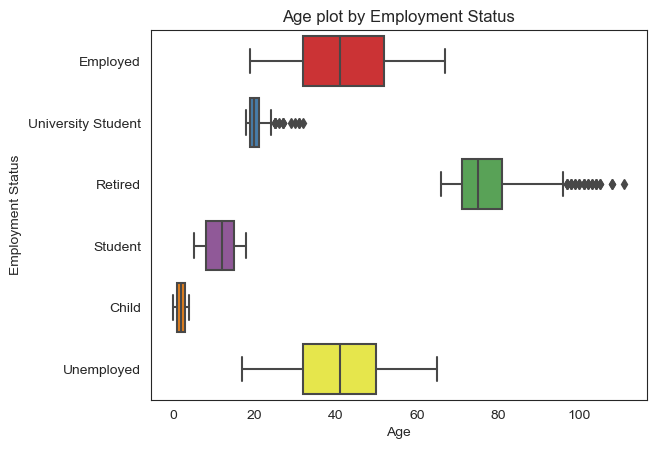

In [1387]:
#Age plot distribution by Employment Status
sns.boxplot(data=df,x='Age',y='Employment Status', palette='Set1')
plt.title('Age plot by Employment Status')
plt.savefig('Age plot by Employment Status', dpi=300, bbox_inches='tight')

In [900]:
Mar_group=df['Age'].groupby(df['Marital Status'])

In [1388]:
#Marital status description
Mar_group.describe().round(1).astype(int)

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,972,39,16,18,27,37,48,95
Married,2550,51,16,18,38,50,63,108
Single,3656,37,14,17,25,36,47,111
Single Child,646,2,1,0,1,2,3,4
Single Student,1910,11,3,5,8,11,14,17
Widowed,346,63,20,18,49,69,76,104


In [1390]:
#Pivot showing marital status by gender
Mar_pivot = df.pivot_table(index='Marital Status', columns='Gender', values='Age', aggfunc='count')
Mar_pivot = Mar_pivot.assign(Total=Mar_pivot.sum(axis=1))
Mar_pivot['% (Total)'] = (Mar_pivot['Total'] / Mar_pivot['Total'].sum()) * 100
Mar_pivot['% (Total)'] = Mar_pivot['% (Total)'].round(0).astype(int)
Mar_pivot

Gender,Female,Male,Total,% (Total)
Marital Status,,,,
Divorced,579,393,972,10
Married,1281,1269,2550,25
Single,1940,1716,3656,36
Single Child,314,332,646,6
Single Student,949,961,1910,19
Widowed,203,143,346,3


In [1391]:
#Pivot showing Age_group by Gender
Gen_pivot = df.pivot_table(index='Age_group', columns='Gender', values='Age', aggfunc='count')
Gen_pivot

Gender,Female,Male
Age_group,,
0-8,606,620
9-17,659,674
18-26,750,694
27-35,716,610
36-44,839,677
45-53,598,530
54-62,489,456
63-71,323,278
72-80,174,169


In [1392]:
#Pivot showing Age group across various religions
Age_pivot = df.pivot_table(index='Age_group', columns='Religion_group', values='Age', aggfunc='count')
Age_pivot

Religion_group,Bahai,Buddist,Christian,Jewish,Muslim,None,Sikh,Undecided,Unfilled,Unknown
Age_group,,,,,,,,,,
0-8,0,0,728,10,28,445,12,2,1,0
9-17,0,0,804,8,27,476,11,1,3,3
18-26,0,0,591,3,31,770,23,0,26,0
27-35,1,1,575,8,48,666,23,1,0,3
36-44,0,0,783,9,10,709,4,1,0,0
45-53,0,0,622,5,13,479,8,1,0,0
54-62,0,0,573,7,16,347,2,0,0,0
63-71,0,0,378,5,9,207,2,0,0,0
72-80,0,0,215,1,1,123,3,0,0,0


In [1393]:
#Pivot showing infirmity across Gender
inf_pivot = df.pivot_table(index='Infirmity', columns='Gender', values='Age', aggfunc='count')
inf_pivot

Gender,Female,Male
Infirmity,,
Blind,3,2
Deaf,6,6
Disabled,4,4
Mental Disability,6,4
None,5215,4777
Physical Disability,17,13
Unfilled,8,5
Unknown Infection,7,3


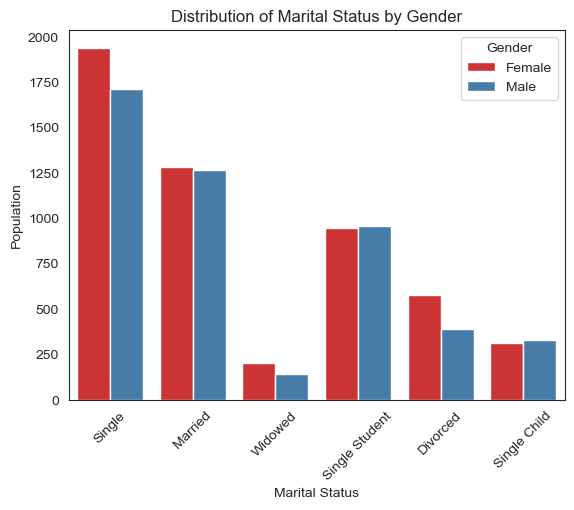

In [1394]:
#Bar plot showing marital status by Gender
sns.set_style('white')
sns.barplot(x='Marital Status', y='Age', hue='Gender',palette='Set1', data=df, estimator=len)
plt.xlabel('Marital Status')
plt.ylabel('Population')
plt.title('Distribution of Marital Status by Gender')
plt.xticks(rotation=45)
plt.savefig('Marital Dist by Gender.png', dpi=300, bbox_inches='tight')
plt.show()


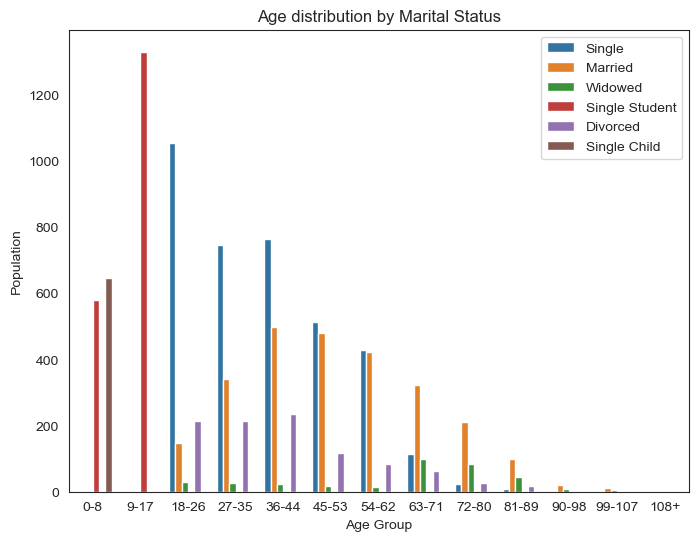

In [1395]:
#Plot showing Marital status across different Age groups
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group', y='Age', hue='Marital Status', data=df,estimator=len)
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Age distribution by Marital Status')
plt.savefig('Age dist by Marital Status.png', dpi=300, bbox_inches='tight')
plt.show()


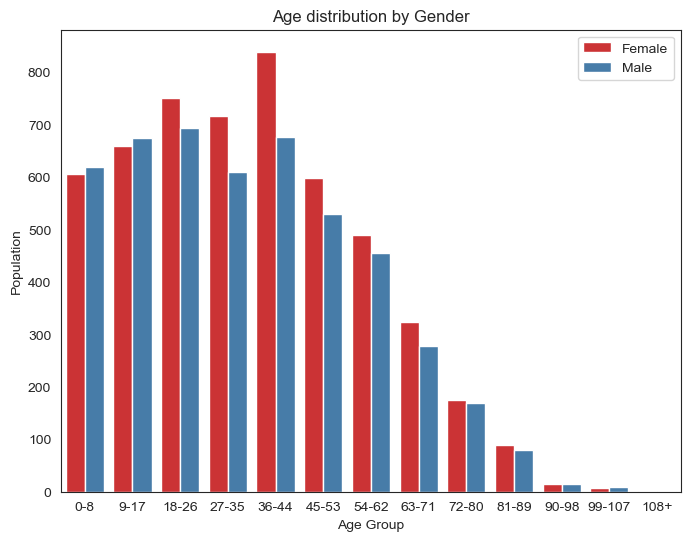

In [1396]:
#Plot showing Age distribution by Gender
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group', y='Age', hue='Gender', data=df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Age distribution by Gender')
plt.savefig('Age dist by Gender.png', dpi=300, bbox_inches='tight')
plt.show()

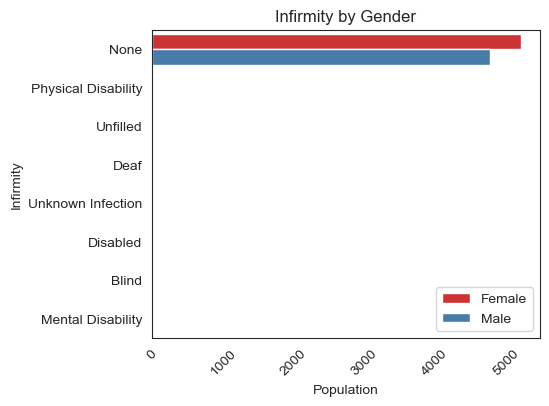

In [1397]:
#Plot showing infirmity by Gender
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(x='Age',y='Infirmity', hue='Gender',data=df,estimator=len,palette='Set1')
ax.legend(loc='lower right')
plt.xlabel('Population')
plt.ylabel('Infirmity')
plt.title('Infirmity by Gender')
plt.xticks(rotation=45)
plt.savefig('Infirmity by Gender.png', dpi=300, bbox_inches='tight')
plt.show()

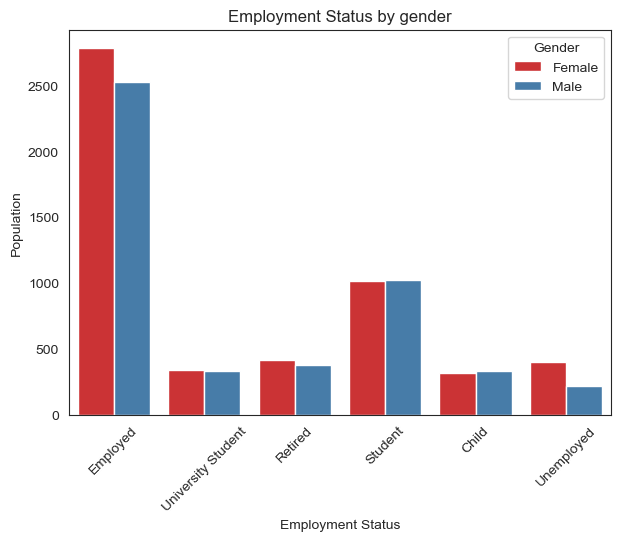

In [1399]:
#Employment Status by Gender
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('white')
sns.barplot(x='Employment Status', y='Age', hue='Gender', data=df,estimator=len,palette='Set1')
plt.xlabel('Employment Status')
plt.xticks(rotation=45)
plt.ylabel('Population')
plt.title('Employment Status by gender')
plt.savefig('employment status by Gender.png', dpi=300, bbox_inches='tight')
plt.show()

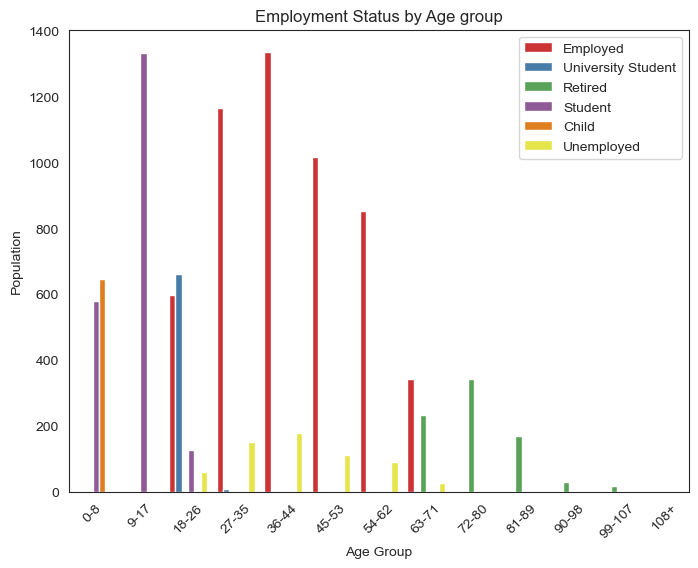

In [1400]:
#Employment status across different Age groups
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group', y='Age', hue='Employment Status', data=df, estimator=len, palette='Set1')

# Move legend to top right
ax.legend(loc='upper right')

plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Population')
plt.title('Employment Status by Age group')

# Save plot as PNG
plt.savefig('employment status by Age.png', dpi=300, bbox_inches='tight')

In [1402]:
#Employment Status counts
df['Employment Status'].value_counts()

Employed              5313
Student               2039
Retired                795
University Student     669
Child                  646
Unemployed             618
Name: Employment Status, dtype: int64

In [1404]:
#Pivot showing gender across various religions
Rel_pivot = df.pivot_table(index='Religion_group', columns='Gender', values='Age', aggfunc='count')
Rel_pivot['Female'].fillna(0,inplace=True)
Rel_pivot['Male'].fillna(0,inplace=True)
Rel_pivot = Rel_pivot.assign(Total=Rel_pivot.sum(axis=1))
Rel_pivot.transpose().round(0).astype(int)

Religion_group,Bahai,Buddist,Christian,Jewish,Muslim,None,Sikh,Undecided,Unfilled,Unknown
Gender,,,,,,,,,,
Female,1,0,2963,36,98,2104,46,3,13,2
Male,0,1,2442,23,87,2195,42,3,17,4
Total,1,1,5405,59,185,4299,88,6,30,6


In [1405]:
df.head(40)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status,Religion_group
0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Media planner,None,Christian,1 Gray Centers,45-53,Employed,Christian
1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,None,Muslim,2 Gray Centers,18-26,University Student,Muslim
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,None,Christian,3 Gray Centers,54-62,Employed,Christian
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",None,None,3 Gray Centers,45-53,Employed,None
4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired Retail banker,None,Christian,4 Gray Centers,72-80,Retired,Christian
5,5,Gray Centers,Anna,Edwards,62,Head,Single,Female,"Civil engineer, consulting",None,Christian,5 Gray Centers,54-62,Employed,Christian
6,5,Gray Centers,Terry,Holt,63,Partner,Single,Male,Careers adviser,None,Christian,5 Gray Centers,63-71,Employed,Christian
7,6,Gray Centers,Stewart,Turner,50,Head,Single,Male,Press photographer,None,Catholic,6 Gray Centers,45-53,Employed,Christian
8,7,Gray Centers,Glenn,Carr,35,Head,Single,Male,Bookseller,None,None,7 Gray Centers,27-35,Employed,None
9,8,Gray Centers,Maurice,Hussain,29,Head,Single,Male,"Engineer, materials",None,Catholic,8 Gray Centers,27-35,Employed,Christian


In [1406]:
#creating an unemployment Dataframe
Unemployed_df=df[df['Employment Status']=='Unemployed']
Unemployed_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status,Religion_group
29,5,Bletchleyrow Street,Rhys,Ford-Ali,40,Head,Married,Male,Unemployed,None,Catholic,5 Bletchleyrow Street,36-44,Unemployed,Christian
68,15,Bletchleyrow Street,Philip,Smith,54,Husband,Married,Male,Unemployed,None,Catholic,15 Bletchleyrow Street,54-62,Unemployed,Christian
77,17,Bletchleyrow Street,Connor,Brooks,44,Head,Divorced,Male,Unemployed,None,Christian,17 Bletchleyrow Street,36-44,Unemployed,Christian
87,19,Bletchleyrow Street,Kerry,Thomson,37,Wife,Married,Female,Unemployed,None,None,19 Bletchleyrow Street,36-44,Unemployed,None
90,20,Bletchleyrow Street,Paige,Stevens,27,Head,Divorced,Female,Unemployed,None,Christian,20 Bletchleyrow Street,27-35,Unemployed,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Burgess Obervatory,Dominic,Stevens-Fry,24,Son,Single,Male,Unemployed,None,None,1 Burgess Obervatory,18-26,Unemployed,None
10025,1,Burgess Obervatory,Martin,Ferguson,60,Lodger,Single,Male,Unemployed,None,None,1 Burgess Obervatory,54-62,Unemployed,None
10057,1,Baker Spire,Neil,Ali,40,None,Single,Male,Unemployed,None,None,1 Baker Spire,36-44,Unemployed,None
10063,1,St.Matthew Manorhouse,Adrian,Bird,26,Son,Single,Male,Unemployed,None,None,1 St.Matthew Manorhouse,18-26,Unemployed,None


In [1407]:
Unemployed_counts = Unemployed_df["Age_group"].value_counts()
Unemployed_counts

36-44     179
27-35     151
45-53     110
54-62      91
18-26      60
63-71      26
9-17        1
0-8         0
72-80       0
81-89       0
90-98       0
99-107      0
108+        0
Name: Age_group, dtype: int64

In [841]:
#Viewing the Unemployment Dataframe
Unemployed_df.head(50)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status,Religion_group
29,5,Bletchleyrow Street,Rhys,Ford-Ali,40,Head,Married,Male,Unemployed,None,Catholic,5 Bletchleyrow Street,36-44,Unemployed,Christian
68,15,Bletchleyrow Street,Philip,Smith,54,Husband,Married,Male,Unemployed,None,Catholic,15 Bletchleyrow Street,45-53,Unemployed,Christian
77,17,Bletchleyrow Street,Connor,Brooks,44,Head,Divorced,Male,Unemployed,None,Christian,17 Bletchleyrow Street,36-44,Unemployed,Christian
87,19,Bletchleyrow Street,Kerry,Thomson,37,Wife,Married,Female,Unemployed,None,None,19 Bletchleyrow Street,36-44,Unemployed,None
90,20,Bletchleyrow Street,Paige,Stevens,27,Head,Divorced,Female,Unemployed,None,Christian,20 Bletchleyrow Street,18-26,Unemployed,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Burgess Obervatory,Dominic,Stevens-Fry,24,Son,Single,Male,Unemployed,None,None,1 Burgess Obervatory,18-26,Unemployed,None
10025,1,Burgess Obervatory,Martin,Ferguson,60,Lodger,Single,Male,Unemployed,None,None,1 Burgess Obervatory,54-62,Unemployed,None
10057,1,Baker Spire,Neil,Ali,40,None,Single,Male,Unemployed,None,None,1 Baker Spire,36-44,Unemployed,None
10063,1,St.Matthew Manorhouse,Adrian,Bird,26,Son,Single,Male,Unemployed,None,None,1 St.Matthew Manorhouse,18-26,Unemployed,None


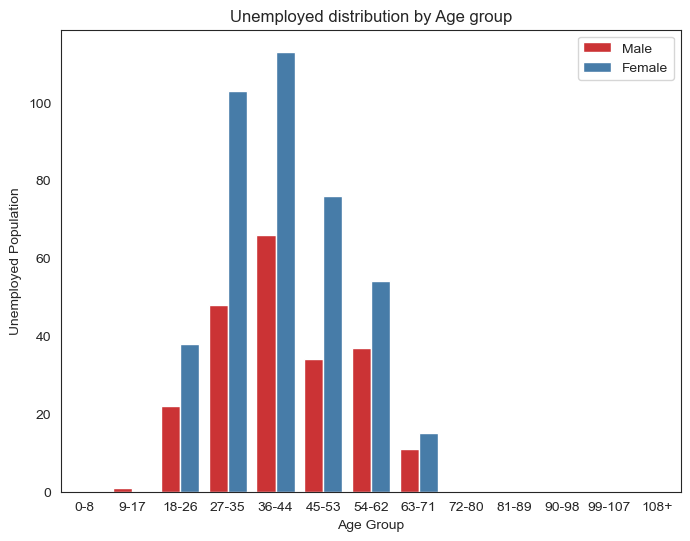

In [1535]:
#Unemployment distribution by Gender
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group', y='Age', hue='Gender', data=Unemployed_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Unemployed Population')
plt.title('Unemployed distribution by Age group')
plt.savefig('Unemployed dist by Age group.png', dpi=300, bbox_inches='tight')
plt.show()

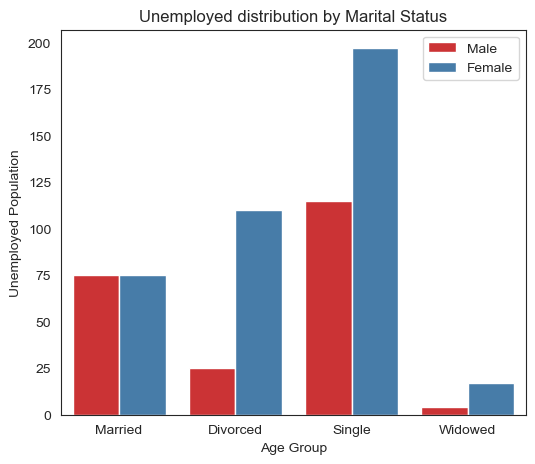

In [1411]:
# Unemployed distribution by Marital Status
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_style('white')
sns.barplot(x='Marital Status', y='Age', hue='Gender', data=Unemployed_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Unemployed Population')
plt.title('Unemployed distribution by Marital Status')
plt.savefig('Unemployed dist by Marital Status.png', dpi=300, bbox_inches='tight')
plt.show()

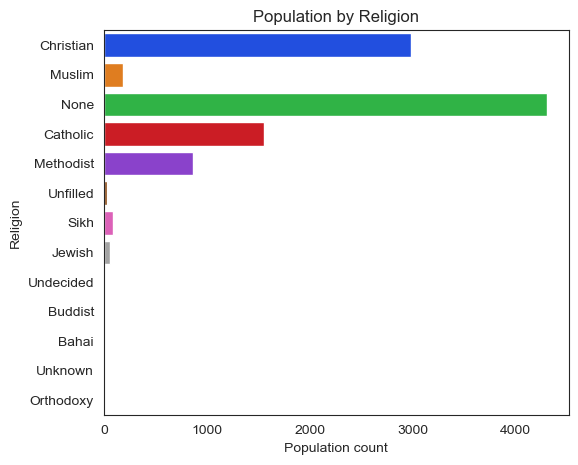

In [1437]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(data=df,x='Age',y='Religion',palette='bright',estimator=len,ax=ax)
ax.set_xlabel('Population count')
ax.set_ylabel('Religion')
ax.set_title('Population by Religion')
plt.savefig('Population by Religion.png', dpi=300)
plt.show()

## Detailed Analysis

In [1420]:
Unemployed_count

13

In [1419]:
Labour_force

6748

In [1435]:
# Unemployment rate =total Unemployed population/ Labour force
Labour_force=sum((df['Age'] > 16) & (df['Age'] < 66))#The UK civil labour force ranges from age 16-66
Unemployed_count=len(Unemployed_df['Employment Status']) #length of Unemployed dataframe
Unemployment_rate=(Unemployed_count/Labour_force) #Unemployment rate= Number of Unemployed/Total labour force
print(f'Unemployment Rate = {Unemployment_rate:.2%}')

Unemployment Rate = 9.16%


In [1438]:
#Religion and Infirmity
Infirmity_pivot = df.pivot_table(index='Infirmity', columns='Religion_group', values='Age', aggfunc='count')
Infirmity_pivot.fillna(0,inplace=True)
Infirmity_pivot = Infirmity_pivot.assign(Total=Infirmity_pivot.sum(axis=1))
Infirmity_pivot.round(0).astype(int)

Religion_group,Bahai,Buddist,Christian,Jewish,Muslim,None,Sikh,Undecided,Unfilled,Unknown,Total
Infirmity,,,,,,,,,,,
Blind,0,0,2,0,1,2,0,0,0,0,5
Deaf,0,0,6,0,0,4,1,0,1,0,12
Disabled,0,0,2,0,0,6,0,0,0,0,8
Mental Disability,0,0,4,0,1,5,0,0,0,0,10
None,1,0,5356,59,182,4266,87,6,29,6,9992
Physical Disability,0,0,20,0,1,9,0,0,0,0,30
Unfilled,0,1,8,0,0,4,0,0,0,0,13
Unknown Infection,0,0,7,0,0,3,0,0,0,0,10


In [1439]:
#Divorced Dataframe
Divorced_df=df[df['Marital Status']=='Divorced']

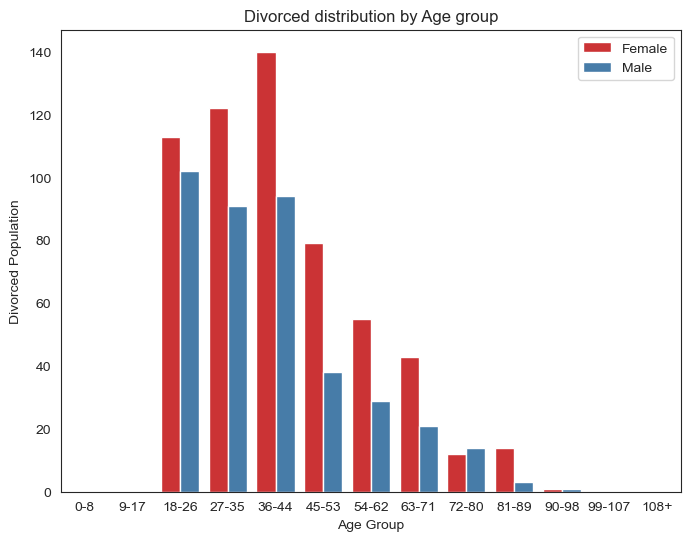

In [1442]:
#Divorcees across Age groups
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group',y='Age', hue='Gender', data=Divorced_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Divorced Population')
plt.title('Divorced distribution by Age group')
plt.savefig('Divorced dist by Age group.png', dpi=300, bbox_inches='tight')
plt.show()

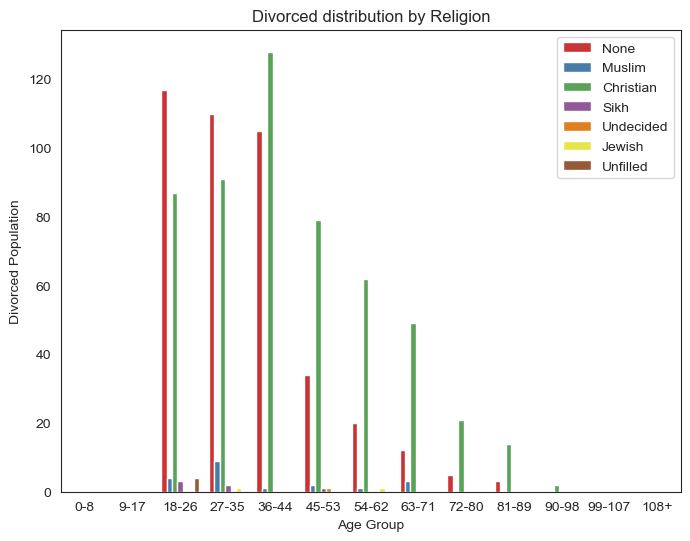

In [1441]:
#Divorce and religion
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group',y='Age', hue='Religion_group', data=Divorced_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Divorced Population')
plt.title('Divorced distribution by Religion')
plt.savefig('Divorced dist by Religion.png', dpi=300, bbox_inches='tight')
plt.show()

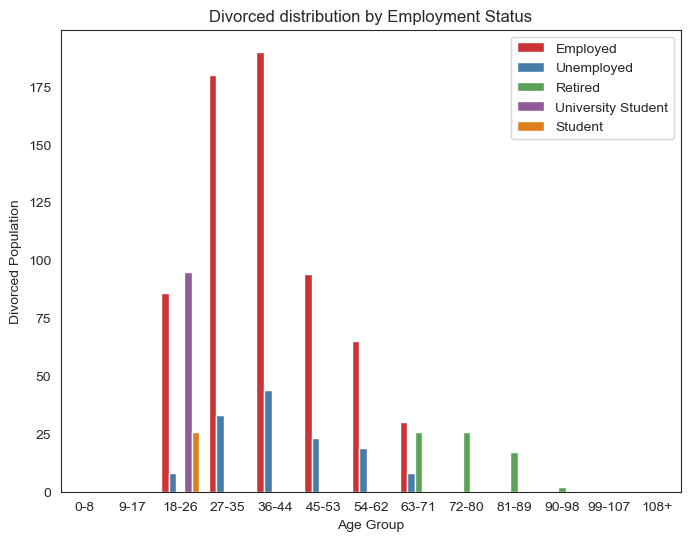

In [920]:
#Divorce and Employment
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.barplot(x='Age_group',y='Age', hue='Employment Status', data=Divorced_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Divorced Population')
plt.title('Divorced distribution by Employment Status')
plt.savefig('Divorced dist by Employment Status.png', dpi=300, bbox_inches='tight')
plt.show()

In [1451]:
#Refined divorce rate per thousand=(Total number of Divorce/ Married Population)*1000
Married_Population=df[(df['Marital Status']=='Married') & (df['Gender']=='Female')]
Divorced_population=df[(df['Marital Status'] == 'Divorced') & (df['Gender'] == 'Female')]
Married_count=len(Married_Population)
Divorced_count=len(Divorced_population)
Divorce_rate=(Divorced_count/Married_count)*1000
print(f'Divorce Rate = {Divorce_rate:.0f} per thousand population')

Divorce Rate = 452 per thousand population


In [1455]:
#Occupancy rate=Total number of people in a house/total number of houses available
# Calculate the total number of people in all houses
total_population = df.shape[0]

# Calculate the total number of rooms (houses) available
total_houses = df['Address'].nunique()

# Calculate the occupancy rate as a percentage
occupancy_rate = (total_population / total_houses) 

# Print the occupancy rate
print(f"The occupancy rate is {occupancy_rate:.2f}")


The occupancy rate is 3.25


In [1454]:
#Cohabiting rate
cohabitors= df[(df['Relationship to Head of House']=='Partner')]
cohabitor_count=len(cohabitors)
cohabiting_rate=(cohabitor_count/total_houses)*1000
print(f"The cohabiting rate is {cohabiting_rate:.0f} per thousand population")

The cohabiting rate is 88 per thousand population


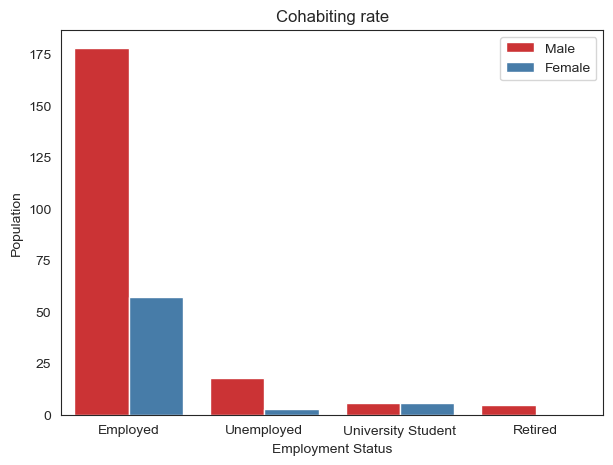

In [1523]:
#Cohabiting rate
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('white')
sns.barplot(x='Employment Status',y='Age', hue='Gender', data=cohabitors,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Employment Status')
plt.ylabel('Population')
plt.title('Cohabiting rate')
plt.savefig('Cohabiting rate.png', dpi=600, bbox_inches='tight')
plt.show()

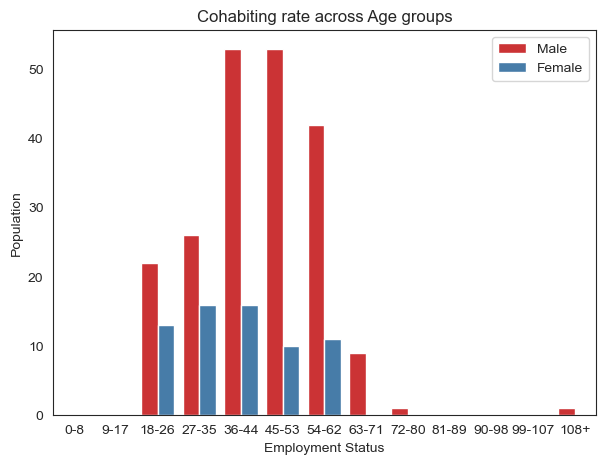

In [1524]:
#Cohabiting rate across age groups
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('white')
sns.barplot(x='Age_group',y='Age', hue='Gender', data=cohabitors,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Employment Status')
plt.ylabel('Population')
plt.title('Cohabiting rate across Age groups')
plt.savefig('Cohabiting rate across Age groups.png', dpi=600, bbox_inches='tight')
plt.show()

In [1466]:
#Male_divorce_df=Divorced_df[Divorced_df['Gender']=='Male']
Female_divorce_df=Divorced_df[Divorced_df['Gender']=='Female']
len(Female_divorce_df)

579

In [1498]:
#Migration
# Number of immigrants= Lodgers + Visitors
immigrants_df=df[(df['Relationship to Head of House']=='Lodger') | (df['Relationship to Head of House']=='Visitor' )]
immigrants_count=len(immigrants_df)
immigration_rate=(immigrants_count/total_population)*1000
#Number of emigrants= female divorcees-Male divorcees
Male_divorce_df=Divorced_df[Divorced_df['Gender']=='Male']
Female_divorce_df=Divorced_df[Divorced_df['Gender']=='Female']
Male_divorce_count=len(Male_divorce_df)
Female_divorce_count=len(Female_divorce_df)
emigrants_count=Female_divorce_count - Male_divorce_count
emigration_rate=(emigrants_count/total_population)*1000

#Migration=(Immigrant count-Emigrant count)/Total Population
migration_rate=((immigrants_count-emigrants_count)/total_population)*1000
print(f"The immigration rate is {immigration_rate:.0f} per thousand population")
print(f"The emigration rate is {emigration_rate:.0f} per thousand population")
print(f"The migration rate is {migration_rate:.0f} per thousand population")

The immigration rate is 59 per thousand population
The emigration rate is 18 per thousand population
The migration rate is 40 per thousand population


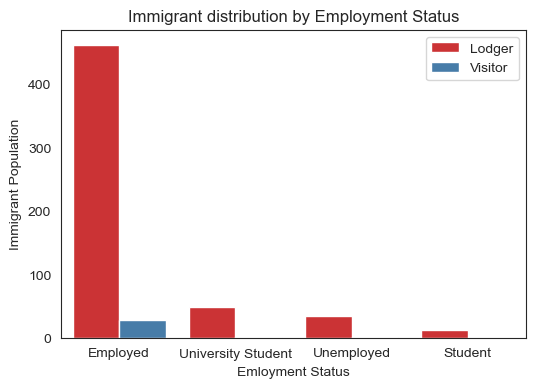

In [1011]:
#Immigrant plot by Employment Status
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style('white')
sns.barplot(x='Employment Status',y='Age', hue='Relationship to Head of House', data=immigrants_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Emloyment Status')
plt.ylabel('Immigrant Population')
plt.title('Immigrant distribution by Employment Status')
plt.savefig('Immigrant dist by Employment Status.png', dpi=300, bbox_inches='tight')
plt.show()

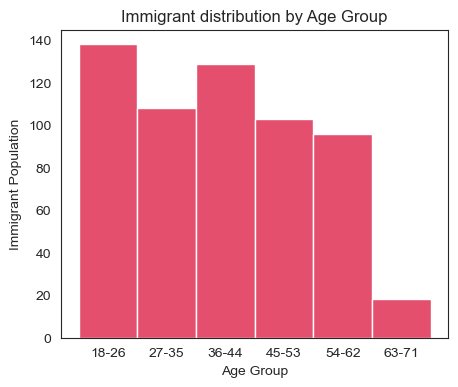

In [1499]:
#Immigrants across different Age groups
fig, ax = plt.subplots(figsize=(5, 4))
sns.set_style('white')
sns.histplot(immigrants_df['Age_group'],color='crimson')
plt.xlabel('Age Group')
plt.ylabel('Immigrant Population')
plt.title('Immigrant distribution by Age Group')
plt.savefig('Immigrant distribution by Age Group.png', dpi=300, bbox_inches='tight')
plt.show()

In [1500]:
#Commuters in the Population
commute_df = df[(df['Employment Status'].isin(['University Student', 'Employed'])) & (df['Religion'].isin(['Christian', 'Muslim', 'Methodist', 'Sikh', 'Jewish', 'Buddhist', 'Bahai', 'Orthodoxy']))]
# Percentage of commuters in the Population
commute_count=len(commute_df)
Commuters_percent=commute_count/total_population
print(f'% of Commuters = {Commuters_percent:.2%}')

% of Commuters = 23.51%


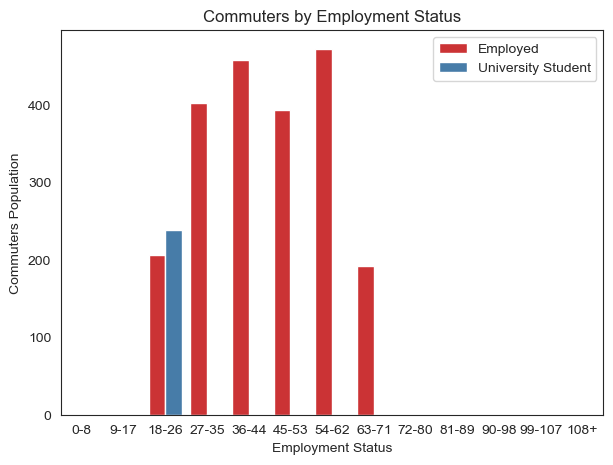

In [1501]:
#Employment Status of commuters
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('white')
sns.barplot(x='Age_group',y='Age', hue='Employment Status', data=commute_df,estimator=len,palette='Set1')
ax.legend(loc='upper right')
plt.xlabel('Employment Status')
plt.ylabel('Commuters Population')
plt.title('Commuters by Employment Status')
plt.savefig('Commuters by Employment Status.png', dpi=300, bbox_inches='tight')
plt.show()

In [1533]:
#Number of houses per address
house_count = df.groupby(['Address']).size().reset_index(name='Occupancy Count')
house_count

,Address,Occupancy Count
0,1 Abbott Mall,4
1,1 Acorn Road,4
2,1 Adams Ports,5
3,1 Ahmed Oval,3
4,1 Andrews Avenue,2
...,...,...
3099,98 Shepherd Cove,11
3100,99 Andrews Avenue,2
3101,99 Lightning Street,5
3102,99 September Street,1


In [1071]:
#Sorting the houses on each street by the occupancy count
house_count_sorted = house_count.sort_values('Occupancy Count', ascending=False)

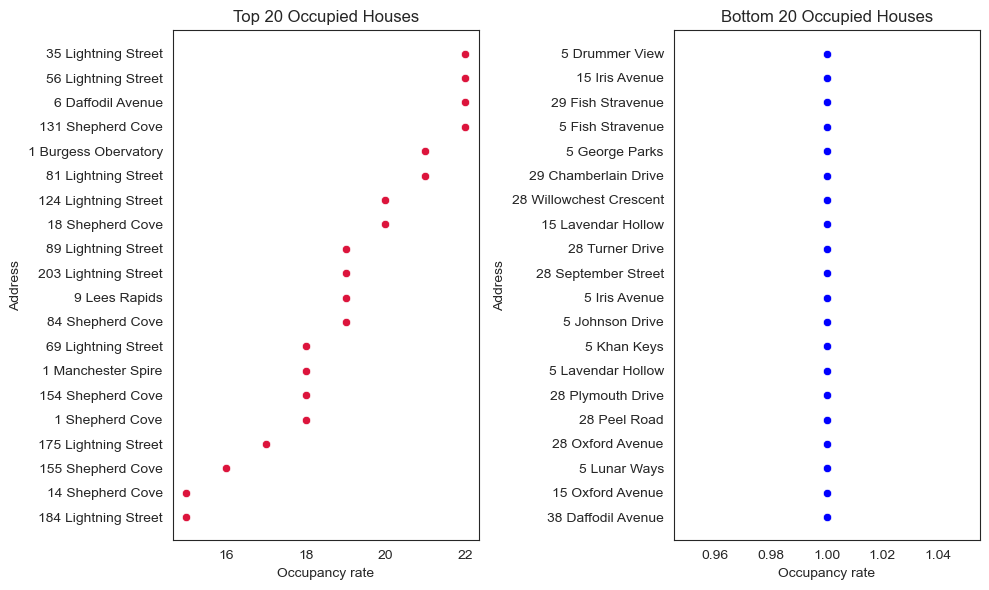

In [1503]:
#Scatter plot showing top 20 and bottom 20 occupancy counts
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

sns.set_style('whitegrid')

sns.scatterplot(x='Occupancy Count',y='Address',color='crimson',data=house_count_sorted.head(20),estimator=len, ax=ax1)
ax1.set_xlabel('Occupancy rate')
ax1.set_ylabel('Address')
ax1.set_title('Top 20 Occupied Houses')

sns.scatterplot(x='Occupancy Count',y='Address',color='blue',data=house_count_sorted.tail(20),estimator=len, ax=ax2)
ax2.set_xlabel('Occupancy rate')
ax2.set_ylabel('Address')
ax2.set_title('Bottom 20 Occupied Houses')

plt.tight_layout()

plt.savefig('Occupancy rate.png', dpi=500, bbox_inches='tight')
plt.show()


In [1504]:
#description of the house_count dataframe
house_count.describe().transpose().astype(int)

,count,mean,std,min,25%,50%,75%,max
Occupancy Count,3104,3,2,1,2,3,4,22


In [1505]:
#Overpopulated houses
overpopulated_houses=house_count[house_count['Occupancy Count'] >10]
len(overpopulated_houses)

71

In [1508]:
#Underpopulated houses
underpopulated_houses=house_count[house_count['Occupancy Count'] <2]
len(underpopulated_houses)

676

In [1097]:
#Overpopulated houses from top to bottom
overpopulated_houses.sort_values('Occupancy Count', ascending=False).head(40)

,Address,Occupancy Count
2595,56 Lightning Street,22
1975,35 Lightning Street,22
2639,6 Daffodil Avenue,22
511,131 Shepherd Cove,22
18,1 Burgess Obervatory,21
2953,81 Lightning Street,21
415,124 Lightning Street,20
981,18 Shepherd Cove,20
1236,203 Lightning Street,19
3029,9 Lees Rapids,19


In [1510]:
#Streets with the highest population and least population
# Group the data by the "Street" column and count the number of rows in each group
street_counts = df.groupby('Street').size().reset_index(name='Count')

# Sort the street counts in ascending order to find the street with the least population
least_populated_street = street_counts.sort_values('Count').iloc[0]['Street']
most_populated_street = street_counts.sort_values('Count', ascending=False).iloc[0]['Street']


print(f"The street with the least population is {least_populated_street}.")
print(f"The street with the highest population is {most_populated_street}.")

The street with the least population is High Tower.
The street with the highest population is Lightning Street.


In [1512]:
#Number of houses on street with least population
len(df[df['Street']=='High Tower'])

1

In [1513]:
#Number of houses on street with highest population
len(df[df['Street']=='Lightning Street'])

1498

In [1514]:
#House occupancy summary
house_counts = df.groupby(['Address']).size().value_counts().reset_index()
house_counts.columns = ['Household Occupancy', 'Number of Houses']
house_counts = house_counts.sort_values(by='Household Occupancy').reset_index(drop=True)

In [1515]:
house_counts

,Household Occupancy,Number of Houses
0,1,676
1,2,818
2,3,482
3,4,385
4,5,487
5,6,75
6,7,38
7,8,30
8,9,19
9,10,23


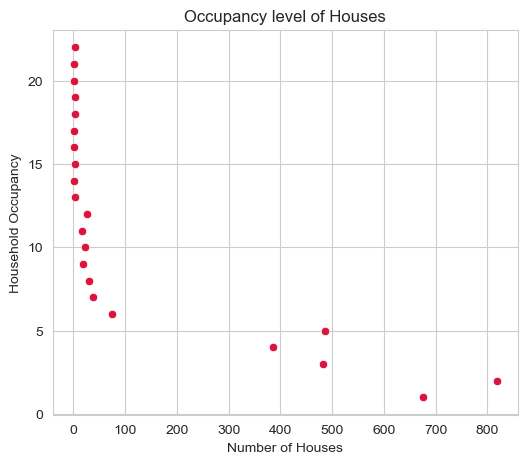

In [1138]:
#House occupancy plot
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_style('whitegrid')
sns.scatterplot(x='Number of Houses',y='Household Occupancy', data=house_counts,estimator=len,color='crimson')
#ax.legend(loc='upper right')
plt.xlabel('Number of Houses')
plt.ylabel('Household Occupancy')
plt.title('Occupancy level of Houses')
plt.savefig('Occupancy rate of Houses.png', dpi=300, bbox_inches='tight')
plt.show()

In [1520]:
#Birth Rate per thousand=(New births/Total Population)*1000
new_births=df[df['Age']==0]
new_births_count=len(new_births)
birth_rate=(new_births_count/total_population)*1000
print(f'The birth rate of the population = {birth_rate:.2f} per thousand')

The birth rate of the population = 12.50 per thousand


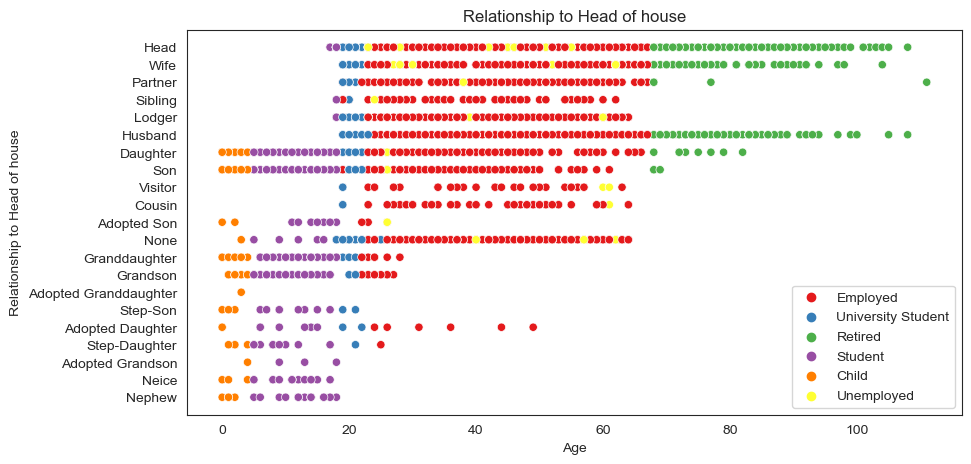

In [1159]:
#Plot showing relationship to head of the house
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('white')
sns.scatterplot(x='Age',y='Relationship to Head of House', data=df,hue='Employment Status',estimator=len,palette='Set1')
ax.legend(loc='lower right')
plt.xlabel('Age')
plt.ylabel('Relationship to Head of house')
plt.title('Relationship to Head of house')
plt.savefig('Relationship to Head of house.png', dpi=600, bbox_inches='tight')
plt.show()

In [1198]:
#Family formation-Total number of family members
family_df = df[~df['Relationship to Head of House'].isin(['Visitor', 'Lodger', 'Partner', 'None'])]

In [1200]:
#Dataframe showing family formation
family_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Age_group,Employment Status,Religion_group
0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Media planner,None,Christian,1 Gray Centers,45-53,Employed,Christian
1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,None,Muslim,2 Gray Centers,18-26,University Student,Muslim
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,None,Christian,3 Gray Centers,54-62,Employed,Christian
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",None,None,3 Gray Centers,45-53,Employed,None
4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired Retail banker,None,Christian,4 Gray Centers,72-80,Retired,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,1,Canterbury Factory,Jill,Taylor,19,Cousin,Single,Female,University Student,None,None,1 Canterbury Factory,18-26,University Student,None
10078,1,Nottingham Haven,Jodie,Bell,31,Head,Married,Female,"Geneticist, molecular",None,Methodist,1 Nottingham Haven,27-35,Employed,Christian
10079,1,Nottingham Haven,David,Bell,30,Husband,Married,Male,"Merchandiser, retail",None,Methodist,1 Nottingham Haven,27-35,Employed,Christian
10080,1,Nottingham Haven,Alan,Bell,1,Son,Single Child,Male,Child,None,Methodist,1 Nottingham Haven,0-8,Child,Christian


In [1525]:
family_group# showing the occupancy count across families in a household

,Household Occupancy,Number of Houses
0,1,1025
1,2,750
2,3,463
3,4,344
4,5,338
5,6,60
6,7,31
7,8,25
8,10,19
9,9,14


In [1526]:
family_group=family_df.groupby(['Address']).size().reset_index(name='Occupancy Count')

In [1527]:
family_group.describe().transpose().round().astype(int)

,count,mean,std,min,25%,50%,75%,max
Occupancy Count,3104,3,2,1,1,2,4,22


In [1218]:
family_group = family_df.groupby(['Address']).size().value_counts().reset_index()
family_group.columns = ['Household Occupancy', 'Number of Houses']
family_counts = family_group.sort_values(by='Household Occupancy').reset_index(drop=True)

In [1528]:
#splitting the summary Dataframe
family_counts.iloc[:10]

,Household Occupancy,Number of Houses
0,1,1025
1,2,750
2,3,463
3,4,344
4,5,338
5,6,60
6,7,31
7,8,25
8,9,14
9,10,19


In [1529]:
#Splitting the summary Dataframe
family_counts.iloc[-11:]

,Household Occupancy,Number of Houses
10,11,11
11,12,8
12,13,2
13,14,2
14,15,1
15,16,2
16,17,4
17,18,2
18,19,1
19,20,1


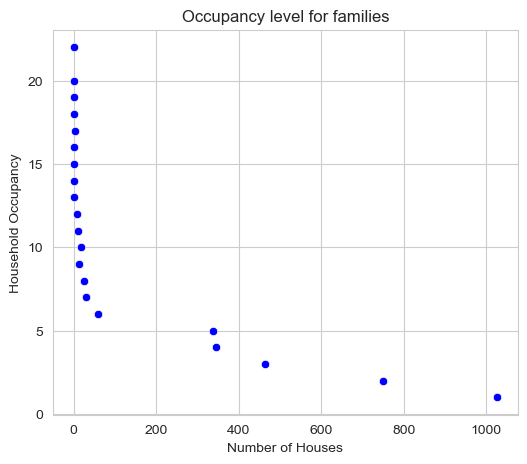

In [1532]:
#plot showing Occupancy level for families
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_style('whitegrid')
sns.scatterplot(x='Number of Houses',y='Household Occupancy', data=family_counts,estimator=len,color='blue')
#ax.legend(loc='upper right')
plt.xlabel('Number of Houses')
plt.ylabel('Household Occupancy')
plt.title('Occupancy level for families')
plt.savefig('family formation.png', dpi=300, bbox_inches='tight')
plt.show()

# Appendices

In [ ]:
# Unemployment rate =total Unemployed population/ Labour force
# Refined divorce rate per thousand=(Total number of Divorce/ Married Population)*1000
# Commuters=Total population commuting for work+total population commuting for school+total population commuting for religion
# Number of immigrants= Lodgers + Visitors
# Number of emigrants= Female divorcees-Male divorcees
# Migration per thousand=((Immigrant count-Emigrant count)/Total Population)*1000
# Birth Rate per thousand=(New births/Total Population)*1000